In [1]:
from fastai import *
from fastai.vision import *

In [12]:
class CustomImageItemList(ImageItemList):
    def open(self, fn):
        img = fn.reshape(28,28)
        img = np.stack((img,)*3, axis=-1)
        return Image(pil2tensor(img, dtype=np.float32))

    @classmethod
    def from_csv_custom(cls, path:PathOrStr, csv_name:str, header:str='infer', **kwargs)->'ItemList':
        df = pd.read_csv(Path(path)/csv_name, header=header)
        res = super().from_df(df, path=path, cols=0, **kwargs)
        res.items = df.iloc[:,1:].apply(lambda x: x.values, axis=1).values
        return res

In [13]:
tfms = get_transforms(do_flip=False)
data = (CustomImageItemList.from_csv_custom(path='./data', csv_name='train.csv')
                           .random_split_by_pct(.2)
                           .label_from_df(cols='label')
                           #.transform(tfms)
                           .databunch(bs=64, num_workers=0))
                          

In [14]:
learn = create_cnn(data, arch=models.resnet50, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


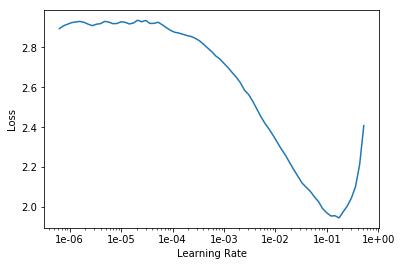

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
lr = 1e-2
learn.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,accuracy
1,0.217583,0.163575,0.950595
2,0.133954,0.121147,0.964405
3,0.061312,0.049416,0.986190
4,0.034599,0.028045,0.991786


In [17]:
learn.save('stage-1')

In [18]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.042493,0.028418,0.991667


In [30]:
learn.validate()

[0.028418409, tensor(0.9917)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


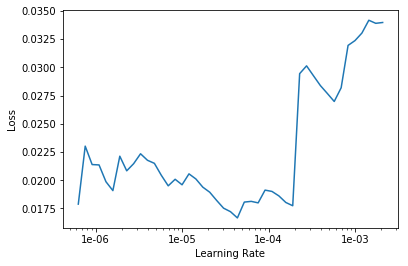

In [29]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(2, max_lr=slice(5e-5,5e-6))

epoch,train_loss,valid_loss,accuracy
1,0.131015,0.075612,0.985000
2,0.112822,0.061423,0.986786


In [24]:
interp = ClassificationInterpretation.from_learner(learn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


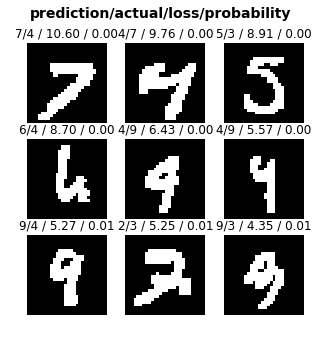

In [25]:
interp.plot_top_losses(9, figsize=(5,5))

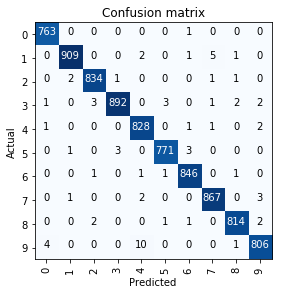

In [28]:
interp.plot_confusion_matrix()

In [26]:
interp.most_confused()

[(9, 4, 10),
 (1, 7, 5),
 (9, 0, 4),
 (3, 2, 3),
 (3, 5, 3),
 (5, 3, 3),
 (5, 6, 3),
 (7, 9, 3),
 (1, 4, 2),
 (2, 1, 2),
 (3, 8, 2),
 (3, 9, 2),
 (4, 9, 2),
 (7, 4, 2),
 (8, 2, 2),
 (8, 9, 2)]